# this chapter will cover gradient ascent and gradient descent

### Here we'll start with a hypothetical situation - trying to set optimal tax rates to maximize a government's revenues

In [1]:
# after some time we have got a tax function that looks like the one shown below such that it does not dissuade the people to pay taxes by seeking tax shelter

import math
def revenue(tax):
    return(100 * (math.log(tax+1) - (tax - 0.2)**2 + 0.04))

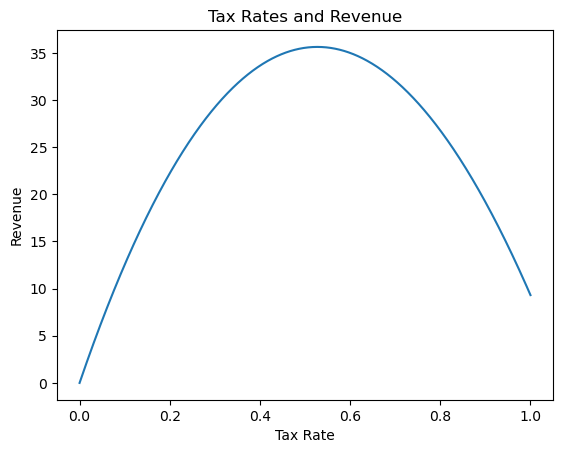

In [2]:
# Generating a simple graph of this curve as follows

import matplotlib.pyplot as plt

xs = [x/1000 for x in range(1001)]
ys = [revenue(x) for x in xs]

plt.plot(xs, ys)
plt.title('Tax Rates and Revenue')
plt.xlabel('Tax Rate')
plt.ylabel('Revenue')
plt.show()

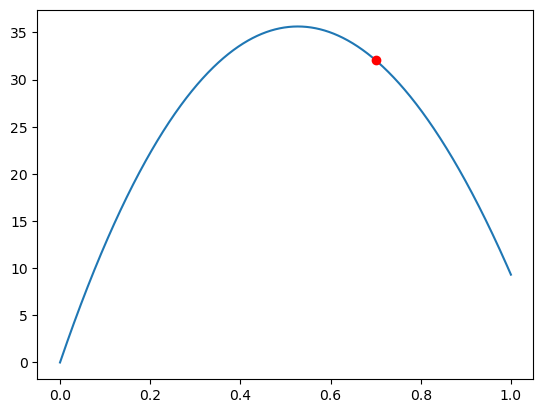

In [14]:
current_rate = 0.7
plt.plot(xs,ys)
plt.plot(current_rate, revenue(current_rate), 'ro')

In [5]:
# we can create a function in python that specifies the derivatives as follow
def revenue_derivative(tax):
    return(100*(1/(tax+1)-2*(tax-0.2)))

In [6]:
print(revenue_derivative(0.7))

-41.17647058823528


In [7]:
# to take this step towards revenue minimum, we should first specify a step size:
step_size = 0.001

In [15]:
# next we can take a step in the direction of maximum by finding the new rate that is proportional to one stepsize away in the direction of the maximum:

current_rate = current_rate+step_size*revenue_derivative(current_rate)
current_rate

0.6588235294117647

In [16]:
print(revenue_derivative(current_rate))

-31.481017939090517


Now we cant keep on executing the same code again and again to find the best rate, so we will convert this into an algorithm

Currently to convert the steps into a rule is only missing when to stop,
although we may never reach the goal but get closer to it in a microscopic distance 

our plan to stop the algorithm is when we are sufficiently close to the asymptote when the amount by whcih we change out rate is very small

we can specify the threshold as 

In [17]:
threshold = 0.00001

In [21]:
# We will stop the process when we are changing the rate by less than this amount at each iteration of our process

maximum_iterations = 100000

keep_going = True
iterations = 0

while(keep_going):
    rate_change = step_size * revenue_derivative(current_rate)
    current_rate = current_rate+rate_change
    
    if abs(rate_change) < threshold:
        keep_going = False
    iterations = iterations+1

In [22]:
revenue(current_rate)

35.63761249035162

In [23]:
revenue_derivative(current_rate)

-0.05413517622540054

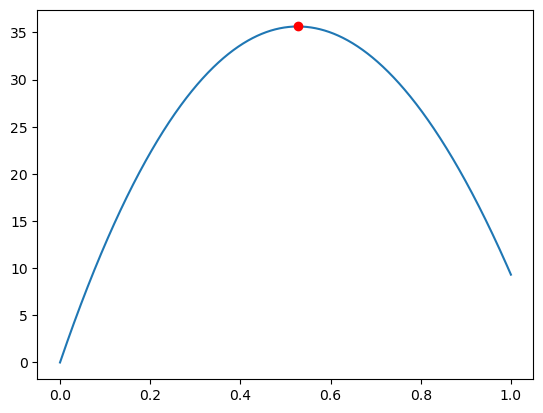

In [24]:
plt.plot(xs,ys)
plt.plot(current_rate, revenue(current_rate), 'ro')

# Education and life income to explore the problem of local maxima in gradient ascent

In [48]:
import math
def income(eduyrs):
    return(math.sin((eduyrs -10.6) * (2*math.pi/4)) + (eduyrs-11)/2)

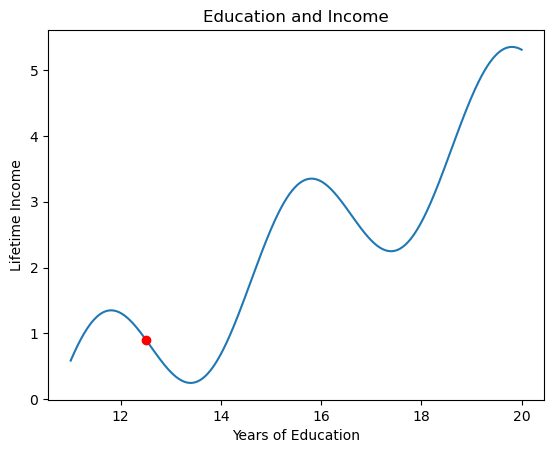

In [49]:
xs = [11 + x/100 for x in list(range(901))]
ys = [income(x) for x in xs]
plt.plot(xs,ys)
current_edu = 12.5
plt.plot(current_edu,income(current_edu),'ro')
plt.title('Education and Income')
plt.xlabel('Years of Education')
plt.ylabel('Lifetime Income')
plt.show()

## Climbing the educational hill the right way

In [50]:
# We can perform gradient descent slightly altered from the previous code as follows now

def income_derivative(eduyrs):
    return(math.cos((eduyrs-10.6) * (2*math.pi/4))+1/2)

threshold = 0.0001
maximum_iterations = 100000

current_education = 12.5
step_size = 0.001

keep_going = True
iterations = 0

while(keep_going):
    education_change = step_size * income_derivative(current_education)
    current_education = current_education + education_change
    if(abs(education_change)<threshold):
        keep_going = False
    if(iterations>=maximum_iterations):
        keep_going = False
    iterations = iterations +1 

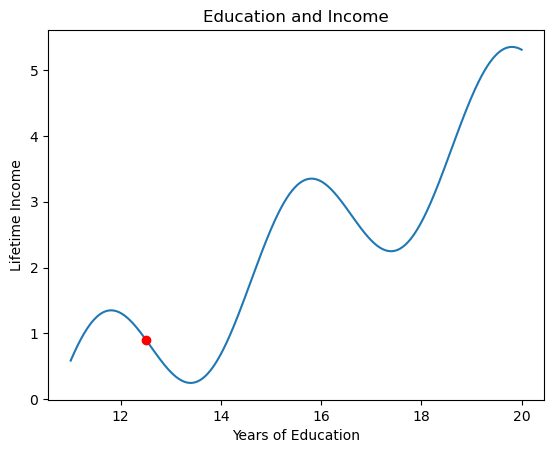

In [51]:
plt.plot(xs,ys)
plt.plot(current_edu,income(current_edu),'ro')
plt.title('Education and Income')
plt.xlabel('Years of Education')
plt.ylabel('Lifetime Income')
plt.show()

An apparently better way to avoid the problem
is to introduce some degree of randomness into the process, so that we can
sometimes step in a way that leads to a locally worse solution, but which in
the long term can lead us to better maxima. An advanced version of gradi-
ent ascent, called stochastic gradient ascent, incorporates randomness for this
reason, and other algorithms, like simulated annealing, do the same.

# From maximization to minimization

moving from maximization to minimization is quite simple. One way to do it is to 'flip' our function or more precisely take its negative 



In [35]:
def revenue_flipped(tax):
    return(0-revenue(tax))

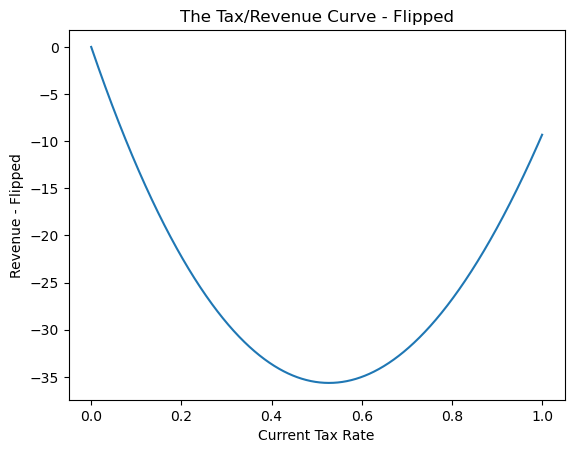

In [52]:
import matplotlib.pyplot as plt
xs = [x/1000 for x in range(1001)]
ys = [revenue_flipped(x) for x in xs]
plt.plot(xs,ys)
plt.title('The Tax/Revenue Curve - Flipped')
plt.xlabel('Current Tax Rate')
plt.ylabel('Revenue - Flipped')
plt.show()

In [53]:
threshold = 0.0001
maximum_iterations = 10000
def revenue_derivative_flipped(tax):
    return(0-revenue_derivative(tax))
current_rate = 0.7
keep_going = True
iterations = 0
while(keep_going):
    rate_change = step_size * revenue_derivative_flipped(current_rate)
    current_rate = current_rate - rate_change
    if(abs(rate_change) < threshold):
        keep_going = False
    if(iterations >= maximum_iterations):
        keep_going = False
    iterations = iterations + 1

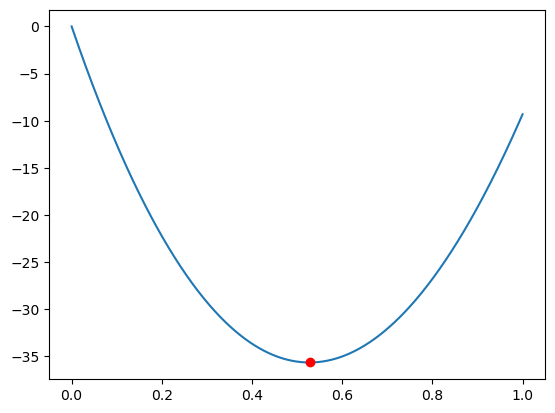

In [54]:

plt.plot(xs,ys)
plt.plot(current_rate, revenue_flipped(current_rate), 'ro')